In [41]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

np.random.seed(123)

%cd /Users/cgu3/Documents/conditional-graph-variational-autoencoder
%pwd

/Users/cgu3/Documents/conditional-graph-variational-autoencoder


'/Users/cgu3/Documents/conditional-graph-variational-autoencoder'

In [42]:
%qtconsole

In [43]:
uniprot_df = pd.read_table('data/support_data/uniprotkb_proteome_UP000005640_AND_revi_2023_10_05.tsv', sep='\t')
uniprot_df = uniprot_df[['STRING', 'Entry']]
uniprot_df.dropna(subset=['STRING'], inplace=True)
uniprot_df['STRING'] = uniprot_df['STRING'].str.replace(';', '')
uniprot_df

,STRING,Entry
2,9606.ENSP00000482829,A0A0B4J2F2
7,9606.ENSP00000377112,A0AV02
8,9606.ENSP00000371212,A0AV96
9,9606.ENSP00000419279,A0AVF1
10,9606.ENSP00000372394,A0AVI4
...,...,...
20371,9606.ENSP00000429608,Q96PS1
20373,9606.ENSP00000402355,Q96T59
20383,9606.ENSP00000359558,Q9H1L0
20388,9606.ENSP00000455079,Q9H693


In [44]:
string_df = pd.read_table('data/interactions/9606.protein_chemical.links.detailed.v5.0.tsv')
string_df.head()

,chemical,protein,experimental,prediction,database,textmining,combined_score
0,CIDm91758680,9606.ENSP00000257254,0,0,0,278,279
1,CIDm91758680,9606.ENSP00000302120,0,0,0,154,154
2,CIDm91758408,9606.ENSP00000006777,0,0,0,225,225
3,CIDm91758408,9606.ENSP00000056217,0,0,0,178,178
4,CIDm91758408,9606.ENSP00000216085,0,0,0,225,225


In [45]:
# check number of interactions with database score > 400
string_df[string_df['database'] >= 400].shape

(194845, 7)

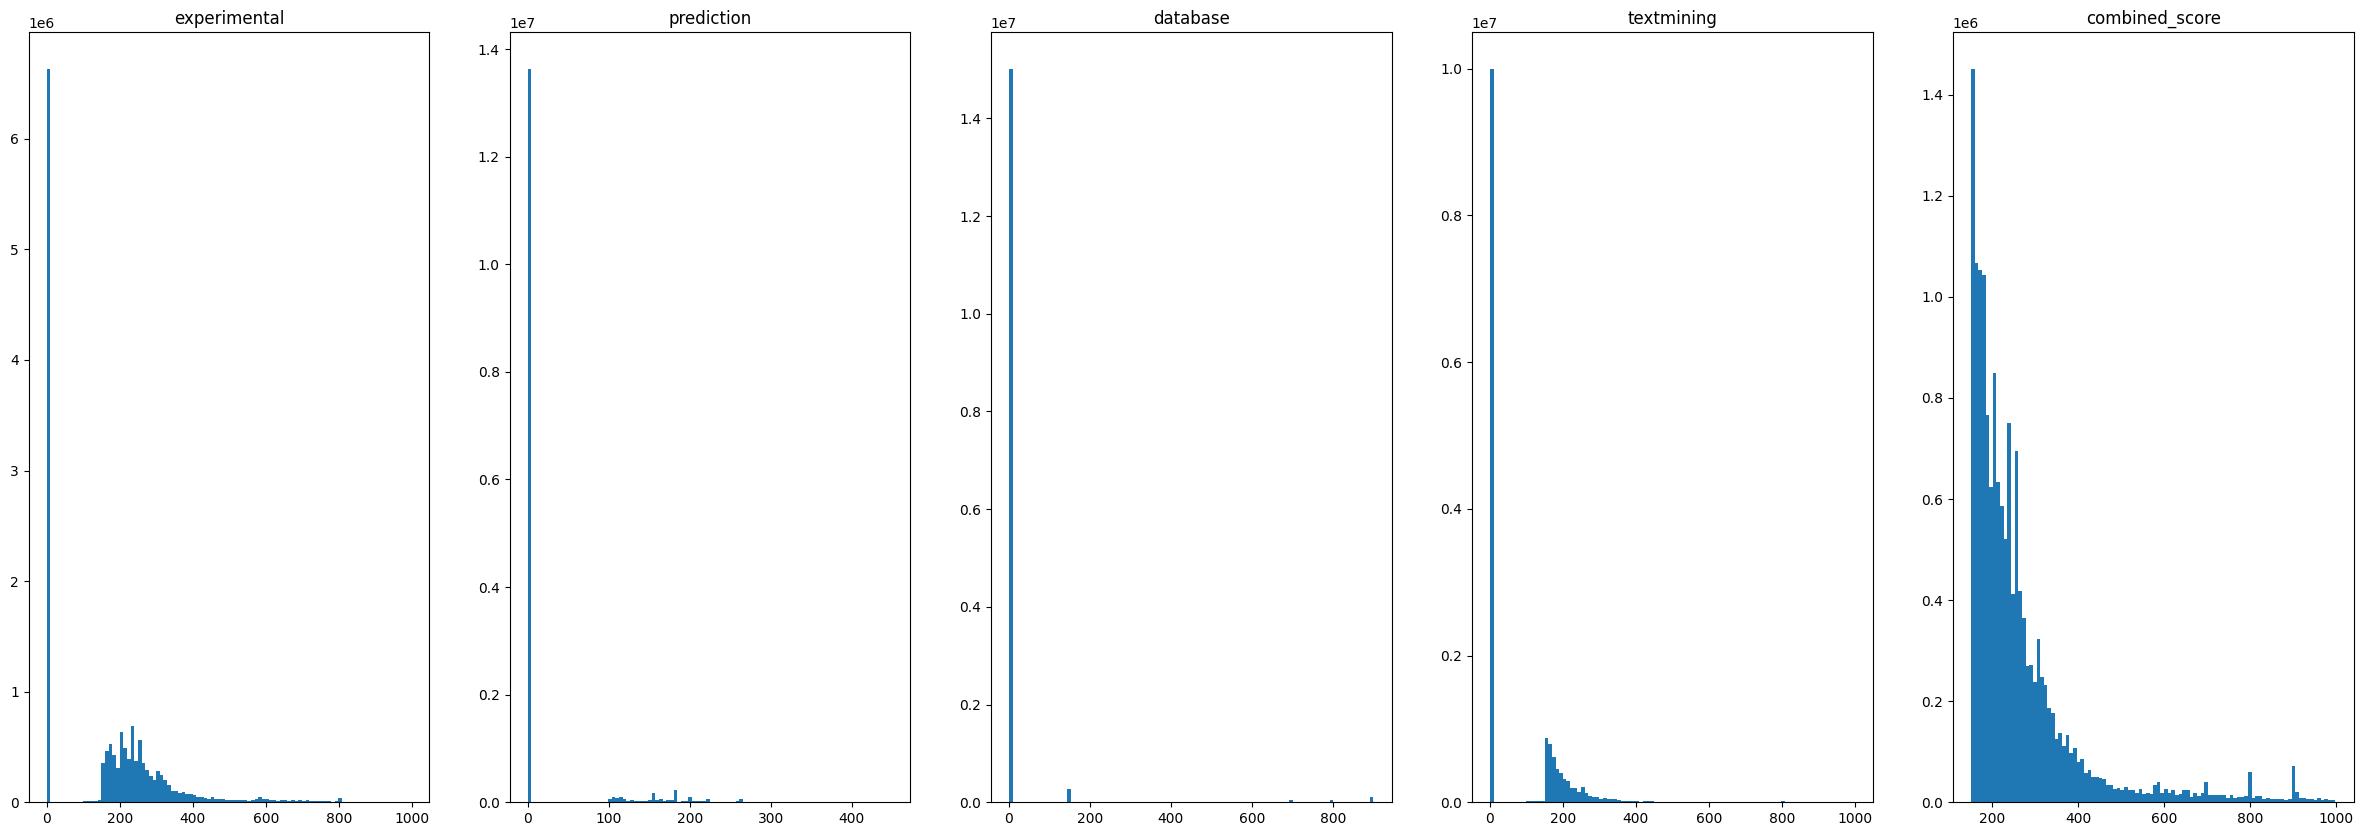

In [46]:
# check score distribution from different sources
fig, ax = plt.subplots(1, 5, figsize=(30, 10))
ax[0].hist(string_df['experimental'], bins=100)
ax[0].set_title('experimental')

ax[1].hist(string_df['prediction'], bins=100)
ax[1].set_title('prediction')

ax[2].hist(string_df['database'], bins=100)
ax[2].set_title('database')

ax[3].hist(string_df['textmining'], bins=100)
ax[3].set_title('textmining')

ax[4].hist(string_df['combined_score'], bins=100)
ax[4].set_title('combined_score');

In [47]:
def get_values_from_dict(keys, dictionary, na_rm=True):
    # Ensure the dictionary is a DataFrame
    dictionary = pd.DataFrame(dictionary)
    
    # Check for duplicated keys in the dictionary
    if dictionary.iloc[:, 0].duplicated().any():
        raise ValueError("Non-unique keys in dictionary: the same key can be mapped to multiple values")
    
    # Convert keys to a DataFrame
    keys_df = pd.DataFrame({'key': keys})
    
    # Join keys with the dictionary to get the corresponding values
    merged = keys_df.merge(dictionary, left_on='key', right_on=dictionary.columns[0], how='left')
    
    # Select the values column
    values = merged[dictionary.columns[1]]
    
    # If na_rm is True, remove NA values
    if na_rm:
        values = values.dropna()
    
    return values.tolist()

In [48]:
protein = get_values_from_dict(string_df['protein'], uniprot_df, na_rm=False)
'NA' in protein

False

In [49]:
string_df['protein'] = protein
string_df.dropna(inplace=True)
string_df
# interaction_df.to_csv('/Users/cgu3/Documents/Grape-Pi/data/miscellaneous/9606.protein.links.v12.0-translated.csv', index=False)

,chemical,protein,experimental,prediction,database,textmining,combined_score
1,CIDm91758680,Q9BZR9,0,0,0,154,154
2,CIDm91758408,Q6NTF9,0,0,0,225,225
3,CIDm91758408,Q12774,0,0,0,178,178
4,CIDm91758408,Q9Y3P4,0,0,0,225,225
6,CIDm91758408,O95140,0,0,0,162,162
...,...,...,...,...,...,...,...
15473934,CIDs00000001,Q00059,0,0,0,151,151
15473935,CIDs00000001,Q9NTX5,0,0,0,279,279
15473936,CIDs00000001,P40925,0,0,0,311,311
15473937,CIDs00000001,O14727,0,0,0,322,322


In [51]:
string_df['combined_score'].min()
string_df['combined_score'].max()

150

999

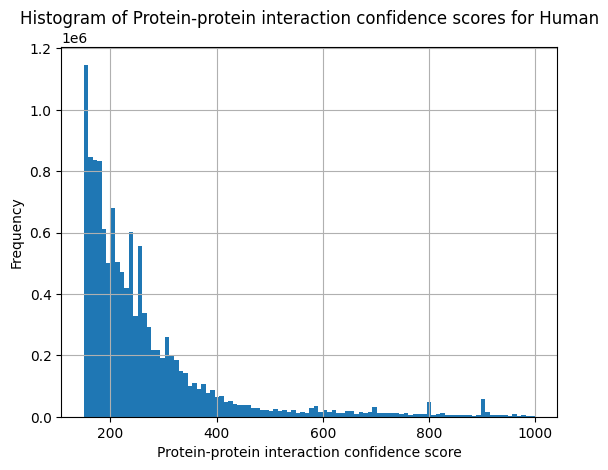

In [52]:
from matplotlib import pyplot as plt
plt.hist(string_df['combined_score'], bins=100)
plt.xlabel('Protein-protein interaction confidence score')
plt.ylabel('Frequency')
plt.title('Histogram of Protein-protein interaction confidence scores for Human')
plt.grid(True);

In [53]:
string_df.to_csv('data/interactions/cpi_use_accession.csv', index=False)